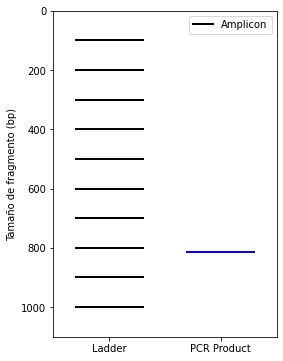

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Función para simular PCR
def simulate_pcr(target, fwd_primer, rev_primer):
    amplicon_sizes = []
    start = 0
    while True:
        start = target.find(fwd_primer, start)
        if start == -1:
            break
        end = target.find(rev_primer, start + len(fwd_primer))
        if end != -1:
            amplicon_sizes.append(end + len(rev_primer) - start)
        start += 1
    return amplicon_sizes

# Datos de entrada
target = "ATGGAATTGCCCAATATTATGCACCCGGTCGCGAAGCTGAGCACCGCATTAGCCGCTGCATTGATGCTGAGCGGGTGCATGCCCGGTGAAATCCGCCCGACGATTGGCCAGCAAATGGAAACTGGCGACCAACGGTTTGGCGATCTGGTTTTCCGCCAGCTCGCACCGAATGTCTGGCAGCACACTTCCTATCTCGACATGCCGGGTTTCGGGGCAGTCGCTTCCAACGGTTTGATCGTCAGGGATGGCGGCCGCGTGCTGGTGGTCGATACCGCCTGGACCGATGACCAGACCGCCCAGATCCTCAACTGGATCAAGCAGGAGATCAACCTGCCGGTCGCGCTGGCGGTGGTGACTCACGCGCATCAGGACAAGATGGGCGGTATGGACGCGCTGCATGCGGCGGGGATTGCGACTTATGCCAATGCGTTGTCGAACCAGCTTGCCCCGCAAGAGGGGATGGTTGCGGCGCAACACAGCCTGACTTTCGCCGCCAATGGCTGGGTCGAACCAGCAACCGCGCCCAACTTTGGCCCGCTCAAGGTATTTTACCCCGGCCCCGGCCACACCAGTGACAATATCACCGTTGGGATCGACGGCACCGACATCGCTTTTGGTGGCTGCCTGATCAAGGACAGCAAGGCCAAGTCGCTCGGCAATCTCGGTGATGCCGACACTGAGCACTACGCCGCGTCAGCGCGCGCGTTTGGTGCGGCGTTCCCCAAGGCCAGCATGATCGTGATGAGCCATTCCGCCCCCGATAGCCGCGCCGCAATCACTCATACGGCCCGCATGGCCGACAAGCTGCGCTGA"
fwd_primer = "ATGGAATTGCCCAATAT"
rev_primer = "GCCGACAAGCTGCGCTGA"

# Simular PCR
amplicon_sizes = simulate_pcr(target, fwd_primer, rev_primer)

# Crear un gel simulado
plt.figure(figsize=(4, 6))

# Simular marcador molecular (ladder)
ladder_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for size in ladder_sizes:
    plt.plot([1.2, 1.8], [size, size], color='black', lw=2)

# Simular bandas de productos de PCR
for size in amplicon_sizes:
    plt.plot([2.2, 2.8], [size, size], color='blue', lw=2)

# Personalizar la gráfica
plt.ylim(0, 1100)
plt.xlim(1, 3)
plt.gca().invert_yaxis()
plt.xticks([1.5, 2.5], ['Ladder', 'PCR Product'])
plt.ylabel("Tamaño de fragmento (bp)")
if amplicon_sizes:
    plt.legend(["Amplicon"], loc="upper right")

# Mostrar gráfica
plt.show()


Tm del cebador forward: 66 °C
Tm del cebador reverse: 58 °C


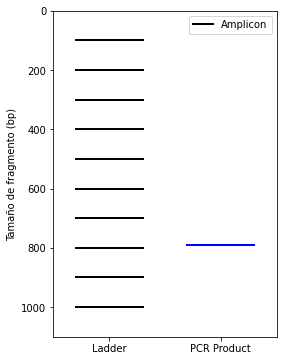

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular Tm (temperatura de fusión) usando la fórmula básica de Wallace
def calculate_tm(primer):
    at_count = primer.count('A') + primer.count('T')
    gc_count = primer.count('G') + primer.count('C')
    return 2 * at_count + 4 * gc_count

# Función para simular PCR considerando temperatura y concentraciones
def simulate_pcr(target, fwd_primer, rev_primer, temp, mg_conc, salt_conc):
    amplicon_sizes = []
    start = 0
    
    # Calcular Tm de los primers
    tm_fwd = calculate_tm(fwd_primer)
    tm_rev = calculate_tm(rev_primer)
    
    print(f"Tm del cebador forward: {tm_fwd} °C")
    print(f"Tm del cebador reverse: {tm_rev} °C")

    # Considerar umbrales de temperatura y concentración de sales para permitir amplificación
    if not (50 <= temp <= 95) or not (0.5 <= mg_conc <= 5) or not (10 <= salt_conc <= 100):
        print("Condiciones no óptimas para la amplificación.")
        return amplicon_sizes

    # La temperatura debe estar dentro de ±5°C del Tm de los primers
    if not (tm_fwd - 5 <= temp <= tm_fwd + 5) or not (tm_rev - 5 <= temp <= tm_rev + 5):
        print("Temperatura de ciclado no compatible con el Tm de los primers.")
        return amplicon_sizes

    while True:
        start = target.find(fwd_primer, start)
        if start == -1:
            break
        end = target.find(rev_primer, start + len(fwd_primer))
        if end != -1:
            amplicon_sizes.append(end + len(rev_primer) - start)
        start += 1
    return amplicon_sizes

# Datos de entrada
target = "ATGGAATTGCCCAATATTATGCACCCGGTCGCGAAGCTGAGCACCGCATTAGCCGCTGCATTGATGCTGAGCGGGTGCATGCCCGGTGAAATCCGCCCGACGATTGGCCAGCAAATGGAAACTGGCGACCAACGGTTTGGCGATCTGGTTTTCCGCCAGCTCGCACCGAATGTCTGGCAGCACACTTCCTATCTCGACATGCCGGGTTTCGGGGCAGTCGCTTCCAACGGTTTGATCGTCAGGGATGGCGGCCGCGTGCTGGTGGTCGATACCGCCTGGACCGATGACCAGACCGCCCAGATCCTCAACTGGATCAAGCAGGAGATCAACCTGCCGGTCGCGCTGGCGGTGGTGACTCACGCGCATCAGGACAAGATGGGCGGTATGGACGCGCTGCATGCGGCGGGGATTGCGACTTATGCCAATGCGTTGTCGAACCAGCTTGCCCCGCAAGAGGGGATGGTTGCGGCGCAACACAGCCTGACTTTCGCCGCCAATGGCTGGGTCGAACCAGCAACCGCGCCCAACTTTGGCCCGCTCAAGGTATTTTACCCCGGCCCCGGCCACACCAGTGACAATATCACCGTTGGGATCGACGGCACCGACATCGCTTTTGGTGGCTGCCTGATCAAGGACAGCAAGGCCAAGTCGCTCGGCAATCTCGGTGATGCCGACACTGAGCACTACGCCGCGTCAGCGCGCGCGTTTGGTGCGGCGTTCCCCAAGGCCAGCATGATCGTGATGAGCCATTCCGCCCCCGATAGCCGCGCCGCAATCACTCATACGGCCCGCATGGCCGACAAGCTGCGCTGA"
fwd_primer = "GCACCCGGTCGCGAAGCTG"
rev_primer = "GCCGACAAGCTGCGCTG"

# Parámetros de ciclado
temp = 62             # Temperatura de hibridación en °C
mg_conc = 1.5         # Concentración de MgCl2 en mM
salt_conc = 50        # Concentración de sales (NaCl o KCl) en mM

# Simular PCR
amplicon_sizes = simulate_pcr(target, fwd_primer, rev_primer, temp, mg_conc, salt_conc)

# Crear un gel simulado
plt.figure(figsize=(4, 6))

# Simular marcador molecular (ladder)
ladder_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for size in ladder_sizes:
    plt.plot([1.2, 1.8], [size, size], color='black', lw=2)

# Simular bandas de productos de PCR
for size in amplicon_sizes:
    plt.plot([2.2, 2.8], [size, size], color='blue', lw=2)

# Personalizar la gráfica
plt.ylim(0, 1100)
plt.xlim(1, 3)
plt.gca().invert_yaxis()
plt.xticks([1.5, 2.5], ['Ladder', 'PCR Product'])
plt.ylabel("Tamaño de fragmento (bp)")
if amplicon_sizes:
    plt.legend(["Amplicon"], loc="upper right")

# Mostrar gráfica
plt.show()
